
# Milestone 4 Tugas Besar Kecerdasan Buatan untuk Bisnis II4042
---
#### 18218011 Widad Istiqomah
#### 18218018 Patrick Segara
#### 18218043 Christovito Hidajat

### Data source
https://www.kaggle.com/c/student-shopee-code-league-sentiment-analysis/data

### Data field
#### review_id - berisi id unik dari sebuah ulasan pengguna;
#### review - berisi ulasan pengguna;
#### rating - penilaian rating dari pengguna

# BAGIAN 1: Business Understanding

Di Indonesia, ada sekitar 46,1 juta pengguna melakukan transaksi online lebih dari sekali dalam sebulan, 18,8 juta pengguna melakukannya kurang dari sekali dalam sebulan, 6,2 juta pengguna melakukannya seminggu sekali, dan lebih dari 5 juta melakukannya lebih dari sekali dalam seminggu. 
(sumber: https://www.researchgate.net/publication/324838610_Sentiment_Analysis_in_the_Sales_Review_of_Indonesian_Marketplace_by_Utilizing_Support_Vector_Machine)

Seringkali review yang ditulis oleh pengguna tidak memiliki struktur yang baik. Padahal, peringkat dan komentar yang diberikan untuk suatu produk oleh pembeli dapat memberikan pemahaman bagi penjual dan pemilik dari platform online marketplace. Ulasan produk membantu mereka memahami kebutuhan pelanggan dan dengan cepat menyesuaikan layanan untuk memberikan pengalaman yang jauh lebih baik bagi pada pesanan berikutnya. Komentar pengguna untuk produk mencakup berbagai aspek seperti layanan pengiriman, pengemasan produk, kualitas produk, spesifikasi produk, metode pembayaran, dll. Oleh karena itu, penting untuk membangun suatu sistem yang akurat untuk memahami ulasan tersebut. 

## Key Question
Dapatkah kita mengeluarkan kebijakan dan fitur yang tepat guna berdasarkan data ulasan dan rating dari pelanggan?

## Business Metrics
#### % peningkatan kepuasan pelanggan
#### % peningkatan pemahaman penjual terhadap ulasan pelanggan
#### % peningkatan lalu lintas kunjungan terhadap platform online marketplace

# BAGIAN 2: Data Understanding

Data yang dianalisis adalah kumpulan data ulasan produk Shopee. Data memiliki lebih dari 150 ribu record berisi ulasan dari berbagai kategori.

In [ ]:
!pip install gensim

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import wordnet
try:
    import cPickle as pickle
except ImportError: 
    import pickle
from nltk.corpus import stopwords 
import warnings
import gensim 
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import time

In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train=pd.read_csv('train.csv')
train.shape

(146811, 3)

In [ ]:
train.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [ ]:
train.rating.value_counts()

4    41865
5    41515
3    35941
1    14785
2    12705
Name: rating, dtype: int64

In [ ]:
train.rating.describe()

count    146811.000000
mean          3.562764
std           1.260537
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Data memiliki 146811 baris dan 3 kolom. Pesebaran data dapat dilihat dari hasil di atas.

In [ ]:
print(train.dtypes)

review_id     int64
review       object
rating        int64
dtype: object


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146811 entries, 0 to 146810
Data columns (total 3 columns):
review_id    146811 non-null int64
review       146811 non-null object
rating       146811 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [ ]:
#data memiliki 2 jenis tipe, yaitu int64 untuk 'review_id' dan 'rating', serta object untuk 'review'

Data memiliki 2 jenis tipe, yaitu int64 untuk 'review_id' dan 'rating', serta object untuk 'review'. Tipe data ini sudah sesuai dengan tipe data yang diinginkan, yaitu angka dengan tipe integer dan kalimat dengan tipe objek.

In [ ]:
train[['rating']].describe()

,rating
count,146811.000000
mean,3.562764
std,1.260537
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [ ]:
train.isnull().sum()

review_id    0
review       0
rating       0
dtype: int64

Karena tidak terdapat data yang kosong, tidak perlu dilakukan proses lebih lanjut untuk mengisi data yang kosong.

In [ ]:
plt.bar(train.rating.value_counts().index,train.rating.value_counts())
plt.show()

<Figure size 640x480 with 1 Axes>

In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Pesebaran data paling banyak berada pada rating 3, 4, dan 5.

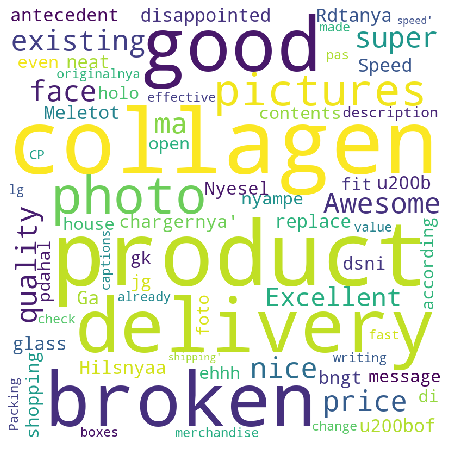

In [ ]:
text = train['review'].values 

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10).generate(str(text)) 

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Tampilan keseluruhan kata pada kolom review dalam bentuk word cloud

In [ ]:
data=train['review'].head(10)
datasplit = data.apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0)
dfsplit = pd.DataFrame(datasplit)
header = ['count']
dfsplit.columns = header
dfsplitsorted = dfsplit.sort_values(by = ['count'], ascending = False)
dfsplitsorted

,count
one,6.0
the,6.0
of,4.0
collagen,3.0
a,3.0
goods,3.0
in,3.0
photo,2.0
The,2.0
but,2.0


Persebaran masing-masing kata dengan jumlahnya untuk 10 baris pertama

<Figure size 1296x1296 with 0 Axes>

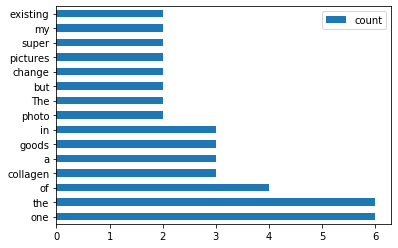

<Figure size 1296x1296 with 0 Axes>

In [ ]:
df = dfsplitsorted.head(15).plot(kind='barh')
plt.figure(figsize = (18, 18), facecolor = None)

Bar chart persebaran masing-masing kata dengan jumlahnya untuk 10 baris pertama dan 15 kata teratas

In [ ]:
listcount = Counter(" ".join(train["review"]).split()).most_common(15)
wordcount = pd.DataFrame(listcount, columns =['Word', 'Count']) 
wordcount

,Word,Count
0,the,57451
1,is,53806
2,good,46571
3,quality,42395
4,product,41825
5,very,35467
6,to,27108
7,The,26669
8,of,24773
9,delivery,23278


Frekuensi keseluruhan kata pada kolom review

<Figure size 1296x1296 with 0 Axes>

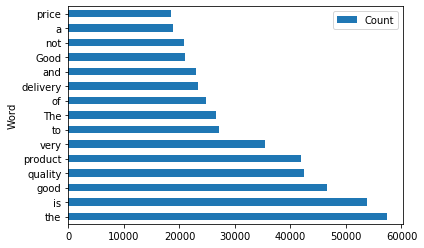

<Figure size 1296x1296 with 0 Axes>

In [ ]:
df = wordcount.plot(kind='barh', x = "Word", y = "Count")
plt.figure(figsize = (18, 18), facecolor = None)

Frekuensi keseluruhan kata pada kolom review dalam bentuk bar chart

### Scatter Plot, ANOVA, dan Korelasi
Dengan atribut yang dimiliki hanya 3, maka tidak bisa dilakukan scatter plotting, ANOVA, dan correlation

# BAGIAN 3: Data Preparation
Kali ini akan dilakukan beberapa perubahan pada data, terutama kolom review yaitu:
- menyeragamkan huruf menjadi non kapital. Hal ini dilakukan untuk mengurangi keberagaman kosa kata yang akan dipelajari oleh mesin. 
- menghapus angka. Hal ini dilakukan karena angka tidak dirasa memiliki sentimen tertentu.
- menghapus tanda baca. Hal ini dilakukan karena tanda baca dirasa tidak memiliki sentimen tertentu.
- menghapus spasi berlebih
- Lemmatize. Lemmatize adalah proses pengelompokan bersama berbagai bentuk infleksi kata sehingga dapat dianalisis sebagai satu item. Lemmatisasi mirip dengan stemming tetapi membawa konteks pada kata-kata. Jadi itu menghubungkan kata-kata dengan arti yang mirip dengan satu kata. Sehingga mesin dapat memahami apa makna sebenarnya dari kata yang dimaksud oleh penulis.
- menghapus stop words/kata yang sering muncul namun tidak memiliki arti pada sentimen

### 1.Menyeragamkan huruf menjadi  non-kapital

In [ ]:
#Membuat fungsi yang dapat menjadikan teks huruf kecil untuk mengurangi kosa kata dari data teks yang digunakan.
def lowercase(text):
   return text.lower()

In [ ]:
#Membuat lower case kolom review dari dataframe
train_lower = train.copy()
train_lower['review'] = train_lower['review'].apply(lambda x:lowercase(x))

In [ ]:
train_lower.review.head(5)

0    ga disappointed neat products .. meletot hilsn...
1      rdtanya replace broken glass, broken chargernya
2    nyesel bngt dsni shopping antecedent photo mes...
3        sent a light blue suit goods ga want a refund
4    pendants came with dents and scratches on its ...
Name: review, dtype: object

Terlihat bahwa teks sekarang menjadi huruf kecil semua

### 2. Menghapus angka

In [ ]:
#Membuat fungsi untuk menghapus angka
def remove_numbers(text):
  result=re.sub(r'\d+', '', text)
  return result

In [ ]:
#contoh
remove_numbers('Saya mengambil 24 sks')

'Saya mengambil  sks'

In [ ]:
train_number = train_lower.copy()
train_number['review'] = train_number['review'].apply(lambda x:remove_numbers(x))
train_number.head()

,review_id,review,rating
0,0,ga disappointed neat products .. meletot hilsn...,1
1,1,"rdtanya replace broken glass, broken chargernya",1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,sent a light blue suit goods ga want a refund,1
4,4,pendants came with dents and scratches on its ...,1


### 3. Menghilangkan tanda baca

In [ ]:
#Membuat fungsi yang menghapus tanda baca
def remove_punctuation(text):
  translator = str.maketrans('','', string.punctuation) #tabel translasi
  return text.translate(translator)

In [ ]:
#Contoh
remove_punctuation('Ayo makan, Budi!')

'Ayo makan Budi'

In [ ]:
train_punct = train_number.copy()
train_punct['review'] = train_punct['review'].apply(lambda x:remove_punctuation(x))
train_punct.head()

,review_id,review,rating
0,0,ga disappointed neat products meletot hilsnya...,1
1,1,rdtanya replace broken glass broken chargernya,1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,sent a light blue suit goods ga want a refund,1
4,4,pendants came with dents and scratches on its ...,1


### 4. Menghapus spasi berlebih

In [ ]:
#Membuat fungsi untuk menghapus spasi berlebih
def remove_whitespace(text):
  return " ".join(text.split())

In [ ]:
#contoh
remove_whitespace('Saya suka   makan nasi goreng')

'Saya suka makan nasi goreng'

In [ ]:
train_space = train_punct.copy()
train_space['review'] = train_space['review'].apply(lambda x:remove_whitespace(x))
train_space.head()

,review_id,review,rating
0,0,ga disappointed neat products meletot hilsnyaa...,1
1,1,rdtanya replace broken glass broken chargernya,1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,sent a light blue suit goods ga want a refund,1
4,4,pendants came with dents and scratches on its ...,1


### 5. Lemmatize

In [ ]:
#Membuat lemmetizer instance
lemmatizer = WordNetLemmatizer()

#Mengubah nltk tag menjadi fungsi tag wordnet
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

#Membuat fungsi lemmatize
def lemmatize(sentence):
    #Tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    # Tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

In [ ]:
#Contoh
lemmatize("I am loving the product")

'I be love the product'

In [ ]:
train_clean = train_space.copy()
train_clean['review'] = train_clean['review'].apply(lambda x: lemmatize(x))
train_clean.head()

,review_id,review,rating
0,0,ga disappoint neat product meletot hilsnyaa sp...,1
1,1,rdtanya replace broken glass break chargernya,1
2,2,nyesel bngt dsni shopping antecedent photo mes...,1
3,3,send a light blue suit good ga want a refund,1
4,4,pendant come with dent and scratch on its surf...,1


In [ ]:
### 6. Mengubah emoji menjadi frasa

'''
Convert emoji to text so that it’s being helpful to preserve information from the review sentence
import re

with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    return text

convert_emojis('I won 🥇 in 🏏')

train_emoji = train_clean.copy()
train_emoji['review'] = train_emoji['review'].apply(lambda x: convert_emojis(x))
train_emoji.head()
'''

### 6. Menghapus stop words dan tokenisasi kalimat

In [ ]:
#membuat fungsi yang menghapus stop words 
def token_nonstop(text):
  stop_words = set(stopwords.words("english"))
  word_tokens = word_tokenize(text)
  filtered_text = [word for word in word_tokens if word not in stop_words]
  return filtered_text

In [ ]:
#Contoh
token_nonstop('I want to buy green and blue shirt, then I want to wash and iron and wash again and iron again them')

['I',
 'want',
 'buy',
 'green',
 'blue',
 'shirt',
 ',',
 'I',
 'want',
 'wash',
 'iron',
 'wash',
 'iron']

In [ ]:
train_cleaned = train_clean.copy()
train_cleaned['review'] = train_cleaned['review'].apply(lambda x : token_nonstop(x))
train_cleaned.head(10)

In [ ]:
train_cleaned.to_csv('train_clean.csv')

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# BAGIAN 4: Modelling

### Open file

In [53]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_clean.csv')
train = train.drop(['Unnamed: 0'], axis=1)
train.head()

,review_id,review,rating
0,0,"['ga', 'disappoint', 'neat', 'product', 'melet...",1
1,1,"['rdtanya', 'replace', 'broken', 'glass', 'bre...",1
2,2,"['nyesel', 'bngt', 'dsni', 'shopping', 'antece...",1
3,3,"['send', 'light', 'blue', 'suit', 'good', 'ga'...",1
4,4,"['pendant', 'come', 'dent', 'scratch', 'surfac...",1


In [7]:
train1 = train.copy()

In [54]:
df1 = train1[train1['rating']==1].iloc[:5000]
df2 = train1[train1['rating']==2].iloc[:5000]
df3 = train1[train1['rating']==3].iloc[:5000]
df4 = train1[train1['rating']==4].iloc[:5000]
df5 = train1[train1['rating']==5].iloc[:5000]
train2 = pd.concat([df1, df2, df3, df4, df5])

In [55]:
train2

,review_id,review,rating
0,0,"['ga', 'disappoint', 'neat', 'product', 'melet...",1
1,1,"['rdtanya', 'replace', 'broken', 'glass', 'bre...",1
2,2,"['nyesel', 'bngt', 'dsni', 'shopping', 'antece...",1
3,3,"['send', 'light', 'blue', 'suit', 'good', 'ga'...",1
4,4,"['pendant', 'come', 'dent', 'scratch', 'surfac...",1
...,...,...,...
110291,110291,"['✨🌺🌺✨🌺🌺✨', '🌺🌺🌺🌺🌺🌺🌺', '🌺🌺🌺🌺🌺🌺🌺', '✨🌺🌺🌺🌺🌺✨', '...",5
110292,110292,"['good', 'product', 'quality', 'excellent', 's...",5
110293,110293,"['👍👍👍😊tq', 'much']",5
110294,110294,"['fast', 'good', 'arrive', 'like', 'barangnya'...",5


### Data Splitting

In [60]:
from sklearn.model_selection import train_test_split

## split data into training, validation, and test data (features and labels, x and y)
train_x, test_x, train_y, test_y = train_test_split(train2['review'], train2['rating'], test_size=0.3, random_state=3)

In [61]:
## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape),1,
      "\nTest set: \t\t{}".format(test_x.shape),1)

			Feature Shapes:
Train set: 		(17500,) 1 
Test set: 		(7500,) 1


In [62]:
train_x

31219     ['yesterday', 'receive', 'good', 'try', 'left'...
107841    ['alhamdulillah', 'nyampe', 'package', 'fast',...
105867    ['pretty', 'good', 'wait', 'little', 'bit', 'l...
32011     ['thanks', 'kak', 'sampeee', 'good', 'safe', '...
106384                       ['thanks', 'maam', 'freebie😊']
                                ...                        
16185     ['good', 'ship', 'without', 'pack', 'bubble', ...
63719     ['excellent', 'quality', 'accommodate', 'seller']
29003     ['good', 'product', 'quality', 'good', 'delive...
1688      ['order', 'size', 'black', 'ash', 'ehh', 'ehh'...
15779                                     ['quite', 'bent']
Name: review, Length: 17500, dtype: object

In [63]:
test_x

29248     ['bagussssssssssssssssssssssssssssssssss', 'ok...
19127     ['product', 'quality', 'standard', 'reapon', '...
30735     ['quality', 'product', 'good', 'value', 'money...
28138     ['thanks', 'kak', 'may', 'always', 'trustworthy']
64217     ['good', 'product', 'quality', 'delivery', 'fa...
                                ...                        
107559                        ['quality', 'worth', 'price']
1747      ['lack', 'good', 'exchange', 'shop', 'dc', 'f'...
68166     ['shop', 'careful', 'packaging', 'product', 's...
106352    ['expect', 'item', 'excellent', 'product', 'we...
14802     ['thanks', 'free', 'gift', 'although', 'qualit...
Name: review, Length: 7500, dtype: object

#### Mengubah kumpulan kata di kolom review

In [64]:
data = []
for review in train_x:
  review = review.replace('[','')
  review = review.replace(']','')
  review = review.replace(',','')
  review = review.replace("'",'')
  for r in review:
    arr = review.split(' ')
  data.append(arr)

In [65]:
data2 = []
for review in test_x:
  review = review.replace('[','')
  review = review.replace(']','')
  review = review.replace(',','')
  review = review.replace("'",'')
  for r in review:
    arr = review.split(' ')
  data2.append(arr)

In [68]:
text = []
for i in data:
  text.append(" ".join(i))

In [70]:
test_X = []
for i in data2:
  test_X.append(" ".join(i))

### Word2Vec
Word2Vec: Method to represent text to generate Word Embeddings which map all the words present in a language into a vector space of a given dimension. We can perform mathematical operations on these vectors which help preserve the relationship between the words.

In [72]:
# Initializing the train model
from gensim.models import word2vec
num_features = 250 #400
min_count = 40
num_processor = 4
context = 10
downsampling = 0.001

model1 =    gensim.models.Word2Vec(data, workers = num_processor, 
                         size = num_features, min_count = min_count,
                         window = context, sample = downsampling) 


#### Combine all the word2vec vector values of each word in each review

In [73]:
def makeFeatureVec(review, model, num_features):
    
    featureVec = np.zeros((num_features,), dtype = "float32")
    
    # Unique word set
    word_index = set(model.wv.index2word)
    
    # Count the number of words
    nword = 0
    
    # Iterate words in a review and if the word is in the unique wordset, add the vector values for each word.
    for word in review:
        if word in word_index:
            nword += 1
            featureVec = np.add(featureVec, model[word])
    
    # Divide the sum of vector values by total number of word in a review.
    featureVec = np.divide(featureVec, nword)        
    
    return featureVec

In [74]:
def getAvgFeatureVec(clean_reviews, model, num_features):
    
    # Keep track of the sequence of reviews, create the number "th" variable.
    review_th = 0
    
    # Row: number of total reviews, Column: number of vector spaces (num_features = 250 we set this in Word2Vec step).
    reviewFeatureVecs = np.zeros((len(clean_reviews), num_features), dtype = "float32")
    
    # Iterate over reviews and add the result of makeFeatureVec.
    for review in clean_reviews:
        reviewFeatureVecs[int(review_th)] = makeFeatureVec(review, model, num_features)
        
        # Once the vector values are added, increase the one for the review_th variable.
        review_th += 1
    
    return reviewFeatureVecs

In [75]:
# Apply "getAvgFeatureVec" function.
trainDataAvg = getAvgFeatureVec(text, model1, 250)
trainDataAvg = np.nan_to_num(trainDataAvg)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [138]:
testX = getAvgFeatureVec(test_X, model1, 250)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [76]:
trainDataAvg1 = np.nan_to_num(trainDataAvg)
trainDataAvg1.shape

(17500, 250)

In [139]:
testX = np.nan_to_num(testX)
testX.shape

(7500, 250)

In [77]:
trainDataAvg1.shape

(17500, 250)

In [78]:
train_y.shape

(17500,)

### Pemodelan menggunakan Support Vector Machine (SVM)

In [31]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier

In [81]:
from sklearn.multiclass import OneVsRestClassifier
sv = LinearSVC(random_state=2018)
clf = OneVsRestClassifier(LinearSVC(max_iter=2000)).fit(trainDataAvg1, train_y)

In [219]:
print(predict('i hate this product so much',model1,clf))

[3]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


#### Menghitung performa model dengan confusion matrix

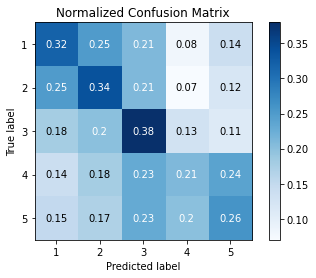

In [82]:
predicted = clf.predict(trainDataAvg1)
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(train_y, predicted, normalize=True)
plt.show()

#### Menghitung performa model dengan roc-auc score

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [84]:
y_score = label_binarize(predicted,classes=[i for i in range (1,6)])
y_test = label_binarize(train_y,classes=[i for i in range (1,6)])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

##### Grafik micro-average ROC curve

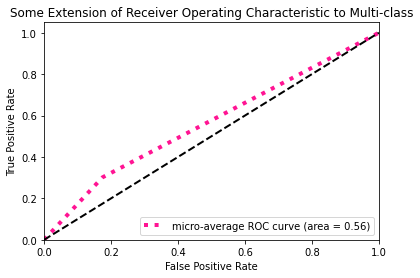

In [85]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some Extension of Receiver Operating Characteristic to Multi-class')
plt.legend(loc="lower right")
plt.show()

##### Grafik ROC curve dari setiap rating

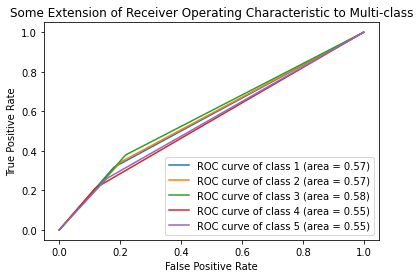

In [86]:
for i in range(0,5):
  plt.plot(fpr[i],tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some Extension of Receiver Operating Characteristic to Multi-class')
plt.legend(loc='lower right')

#### Classification report dari pemodelan menggunakan SVM

In [141]:
from sklearn.metrics import accuracy_score, classification_report 

In [143]:
# Making a prediction on the test set 
prediction = clf.predict(testX)
   
# Evaluating the model 
print(f"Test Set Accuracy : {accuracy_score(test_y, prediction) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(test_y, prediction)}") 

Test Set Accuracy : 30.0 %


Classification Report : 

              precision    recall  f1-score   support

           1       0.32      0.32      0.32      1537
           2       0.30      0.35      0.32      1509
           3       0.31      0.37      0.34      1525
           4       0.28      0.21      0.24      1452
           5       0.29      0.25      0.27      1477

    accuracy                           0.30      7500
   macro avg       0.30      0.30      0.30      7500
weighted avg       0.30      0.30      0.30      7500



In [158]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import f1_score
from sklearn import svm
kfold = StratifiedKFold(n_splits=3, random_state = 33)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [155]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(trainDataAvg1, train_y)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(trainDataAvg1, train_y)

In [156]:
poly_pred = poly.predict(testX)
rbf_pred = rbf.predict(testX)

In [159]:
poly_accuracy = accuracy_score(test_y, poly_pred)
poly_f1 = f1_score(test_y, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  28.04
F1 (Polynomial Kernel):  24.50


In [162]:
from sklearn.metrics import make_scorer

In [163]:
svc_clf = svm.SVC(C=0.7,tol=0.01,kernel='rbf',cache_size=500)
param_grid = {'C':np.linspace(0.1,1.0,10),'tol':[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1],'kernel':['rbf','poly'],'degree':[3,4,5,6,7]}

In [ ]:
gs_svc = GridSearchCV(estimator = svc_clf, param_grid = param_grid, scoring = 'roc_auc', cv = cv)
gs_svc.fit(trainDataAvg1, train_y)

In [87]:
# !pip install wheel
# !pip install scikit-plot

## Pemodelan menggunakan bernoulli naive bayes

#### Menghitung performa model menggunakan confusion matrix

In [88]:
bnb = BernoulliNB()
clf2 = OneVsRestClassifier(bnb).fit(trainDataAvg1, train_y)

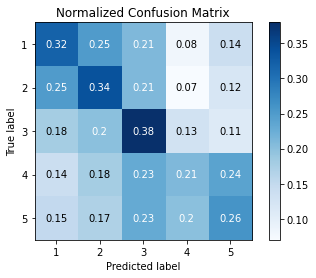

In [89]:
nb_predicted = clf2.predict(trainDataAvg1)
skplt.metrics.plot_confusion_matrix(train_y, predicted, normalize=True)
plt.show()

#### Menghitung performa model dengan roc-auc score

In [90]:
y_score = label_binarize(nb_predicted,classes=[i for i in range (1,6)])
y_test = label_binarize(train_y,classes=[i for i in range (1,6)])
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

##### Grafik micro-average ROC curve

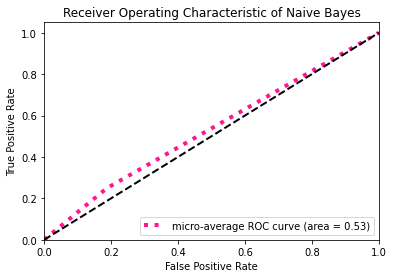

In [91]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic of Naive Bayes')
plt.legend(loc="lower right")
plt.show()

##### Grafik ROC curve dari setiap rating

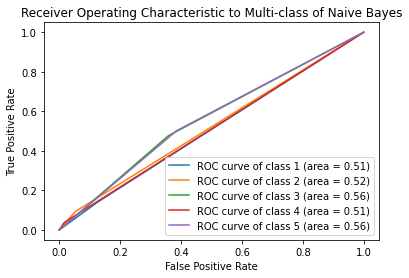

In [92]:
for i in range(5):
  plt.plot(fpr[i],tpr[i],label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i+1, roc_auc[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-class of Naive Bayes')
plt.legend(loc='lower right')

#### Classification report dari pemodelan menggunakan Bernoulli NB

In [144]:
# Making a prediction on the test set 
prediction = clf2.predict(testX)
   
# Evaluating the model 
print(f"Test Set Accuracy : {accuracy_score(test_y, prediction) * 100} %\n\n") 
print(f"Classification Report : \n\n{classification_report(test_y, prediction)}") 

Test Set Accuracy : 24.64 %


Classification Report : 

              precision    recall  f1-score   support

           1       0.21      0.13      0.17      1537
           2       0.32      0.09      0.15      1509
           3       0.26      0.48      0.33      1525
           4       0.22      0.02      0.04      1452
           5       0.24      0.49      0.32      1477

    accuracy                           0.25      7500
   macro avg       0.25      0.25      0.20      7500
weighted avg       0.25      0.25      0.20      7500



## Deep Learning

In [ ]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [ ]:
len(text)

146811

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(text)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(text)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [ ]:
word_index

In [ ]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(train['rating'])

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 85        
Total params: 164,837
Trainable params: 164,837
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, verbose=2)

Epoch 1/10
4588/4588 - 50s - loss: 5.1622 - accuracy: 0.1316
Epoch 2/10
4588/4588 - 50s - loss: 5.1622 - accuracy: 0.1452
Epoch 3/10
4588/4588 - 50s - loss: 5.1622 - accuracy: 0.1360
Epoch 4/10
4588/4588 - 50s - loss: 5.1622 - accuracy: 0.1330
Epoch 5/10
4588/4588 - 50s - loss: 5.1622 - accuracy: 0.1419
Epoch 6/10
4588/4588 - 49s - loss: 5.1622 - accuracy: 0.1286
Epoch 7/10
4588/4588 - 49s - loss: 5.1622 - accuracy: 0.1497
Epoch 8/10
4588/4588 - 50s - loss: 5.1622 - accuracy: 0.1491
Epoch 9/10
4588/4588 - 49s - loss: 5.1622 - accuracy: 0.1390
Epoch 10/10
4588/4588 - 50s - loss: 5.1622 - accuracy: 0.1449


In [ ]:
def model(train,w2vec)

# Bagian 5: Dump model

In [222]:
pickle.dump(clf, open('/content/drive/MyDrive/Colab Notebooks/SVM.sav','wb'))
pickle.dump(model1, open('/content/drive/MyDrive/Colab Notebooks/w2vec_model.sav', 'wb'))

In [218]:
def predict(review,w2vec_model,model):
	paragraf = [review] 
	word_avg = getAvgFeatureVec(paragraf,w2vec_model,250)
	word_avg = np.nan_to_num(word_avg)
	predicted = model.predict(word_avg)
	return predicted

In [227]:
test_y.value_counts()

1    1537
3    1525
2    1509
5    1477
4    1452
Name: rating, dtype: int64